# Numerical Simulation Laboratory

# Numerical exercise 11

## Exercise 11.1
Osservare il comportamento della regressione lineare effettuata tramite la rete neurale variando il numero di epoche, il numero di valori di training e il rumore dei dati di validazione.

Per questo esercizio è stata utilizzata una rete neurale semplice composta da un singolo neurone: qui di seguito è riportata l'implementazione della rete utilizzando *Keras*.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">model = Sequential()</font><br />
<font face="Courier">model.add(Dense(1, input_shape=(1,))) </font><br />
    <font face="Courier">model.compile(optimizer='sgd', loss='mse', metrics=['mse'])</font> <br />
</p>

La rete a un neurone quindi riceve un singolo input, ottimizza i parametri tramite *Stocastic Gradient Descent* e utilizza come funzione di loss l'errore quadratico medio.

### <font color='blue'> Numero di epoche </font> 
Valuto la regressione lineare effettuata dalla rete neurale variando il numero di epoche ovvero il numero di iterazioni sull'intero insieme di dati in input.

Per ogni esperimento ho utilizzato:
- $m_{vero}=4$, $q_{vero}=3$
- $100$ valori di training
- $10$ dati di validazione
- rumore nullo

I grafici ottenuti mostrano come la predizione della rete diventa man mano più precisa aumentando le iterazioni sui dati di input, come ci si aspetterebbe.

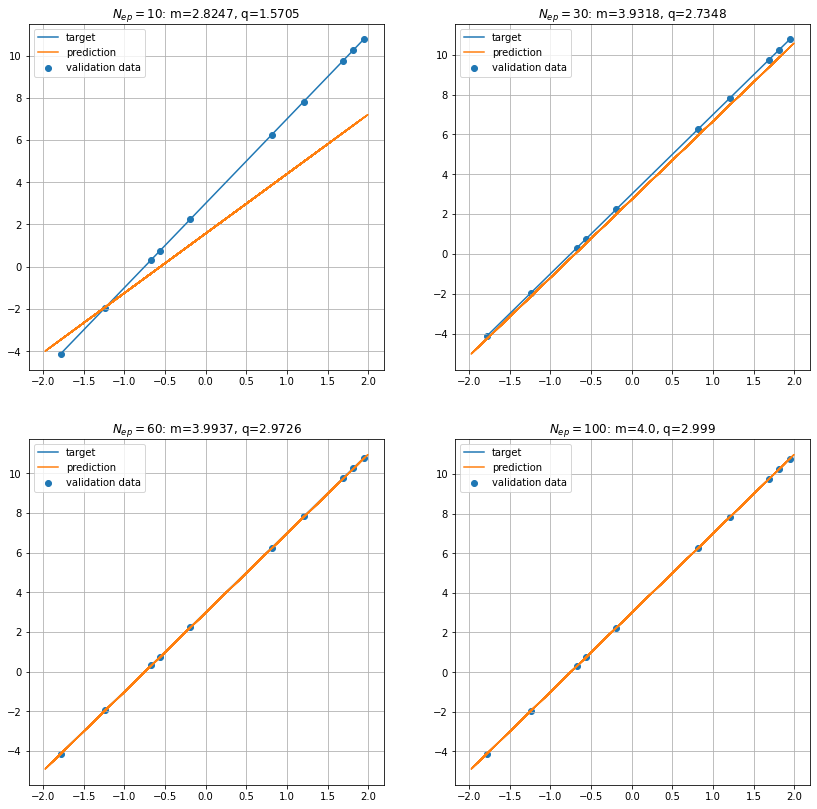

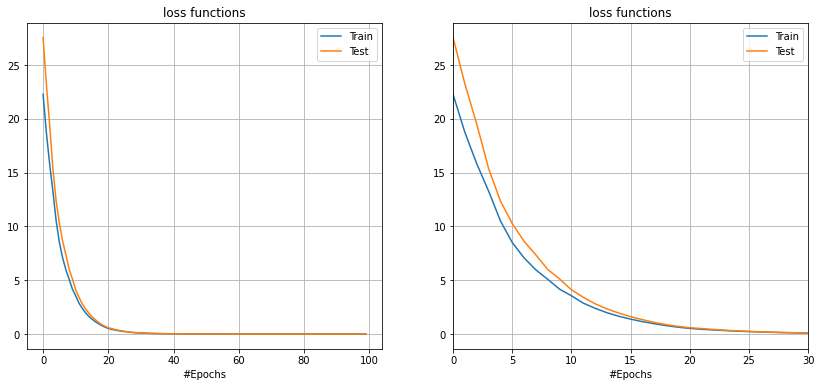

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from source.functions1 import line

ep=np.array([10,30,60,100])
w=np.loadtxt('data/vsEpochs/weights.dat')
pred=np.loadtxt('data/vsEpochs/pred.dat')
loss, val_loss=np.loadtxt('data/vsEpochs/loss.dat')
x_val, y_val=np.loadtxt('data/vsEpochs/valid.dat')

sub = [221, 222, 223, 224]
plt.figure(figsize=(14, 14))

for i in range(len(ep)):
    plt.subplot(sub[i])
    plt.scatter(x_val,y_val, label='validation data')
    plt.plot(x_val,line(x_val), label='target')
    plt.plot(pred[0],pred[i+1], label='prediction')
    plt.title('$N_{ep} = ' + str(ep[i]) + '$: m='+str(round(w[i][0], 4))+', q='+str(round(w[i][1], 4)))
    plt.grid(True)
    plt.legend()

plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.plot(loss, label='Train')
plt.plot(val_loss, label='Test')
plt.xlabel('#Epochs')
#plt.ylabel()
plt.title('loss functions')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.plot(loss, label='Train')
plt.plot(val_loss, label='Test')
plt.xlabel('#Epochs')
#plt.ylabel()
plt.xlim(0,30)
plt.title('loss functions')
plt.grid(True)
plt.legend()

plt.show()

### <font color='blue'> Numero di dati di training </font> 
Valuto il comportamento della regressione lineare variando il numero di dati di training.

Per ogni esperimento ho utilizzato:
- $m_{vero}=4$, $q_{vero}=3$
- $30$ epoche
- $10$ dati di validazione
- rumore nullo

I grafici ottenuti mostrano che la predizione della rete neurale diventa precisa utilizzando un insieme grande di dati di training in input, come è lecito aspettersi; si noti inoltre come la funzione di loss si abbassa più rapidamente aumentando i dati.

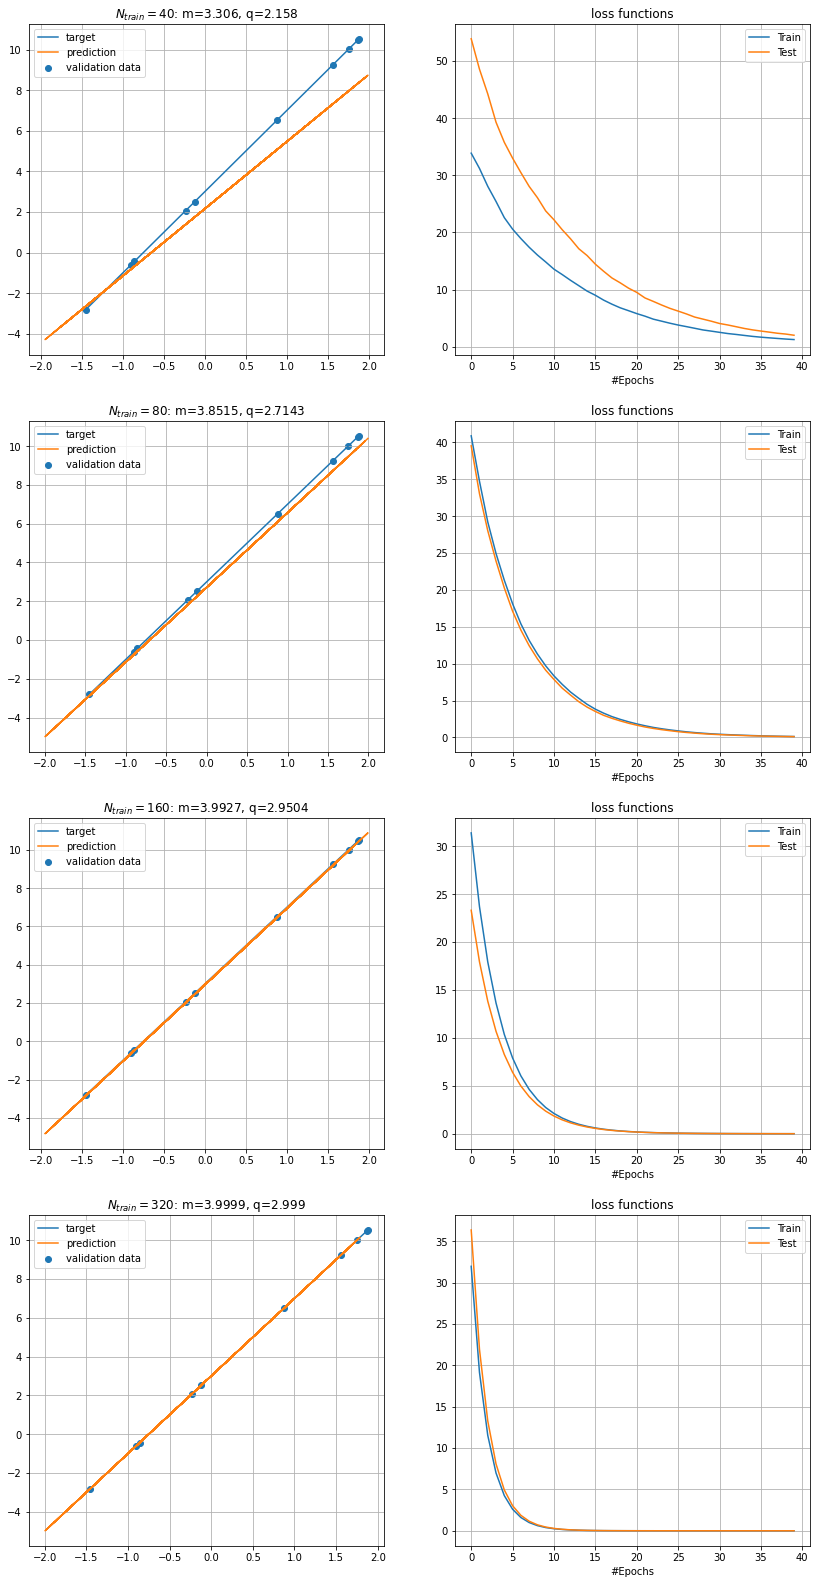

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Ntrain=np.array([40,80,160,320])
w=np.loadtxt('data/vsTrain/weights.dat')
l=np.loadtxt('data/vsTrain/loss.dat')
x_val, y_val=np.loadtxt('data/vsTrain/valid.dat')
pred=np.loadtxt('data/vsTrain/pred.dat')

sub = np.arange(421,428,2)
plt.figure(figsize=(14, 28))

for i in range(len(Ntrain)):
    plt.subplot(sub[i])
    plt.scatter(x_val,y_val, label='validation data')
    plt.plot(x_val,line(x_val), label='target')
    plt.plot(pred[2*i],pred[2*i+1], label='prediction')
    plt.title('$N_{train} = ' + str(Ntrain[i]) + '$: m='+str(round(w[i][0], 4))+', q='+str(round(w[i][1], 4)))
    plt.grid(True)
    plt.legend()

    plt.subplot(sub[i]+1)
    plt.plot(l[2*i], label='Train')
    plt.plot(l[2*i+1], label='Test')
    plt.xlabel('#Epochs')
    #plt.ylabel()
    plt.title('loss functions')
    plt.grid(True)
    plt.legend()

plt.show()

### <font color='blue'> Rumore </font> 
Valuto il comportamento della regressione lineare introducendo del rumore nei dati di validazione.

Per ogni esperimento ho utilizzato:
- $m_{vero}=4$, $q_{vero}=3$
- $40$ epoche
- $100$ dati di validazione
- $10$ dati di validazione

I grafici ottenuti mostrano che, anche in presenza di rumore, utilizzando un numero sufficeintemente elevato di dati e di iterazioni la predizione della rete neurale rimane molto precisa.

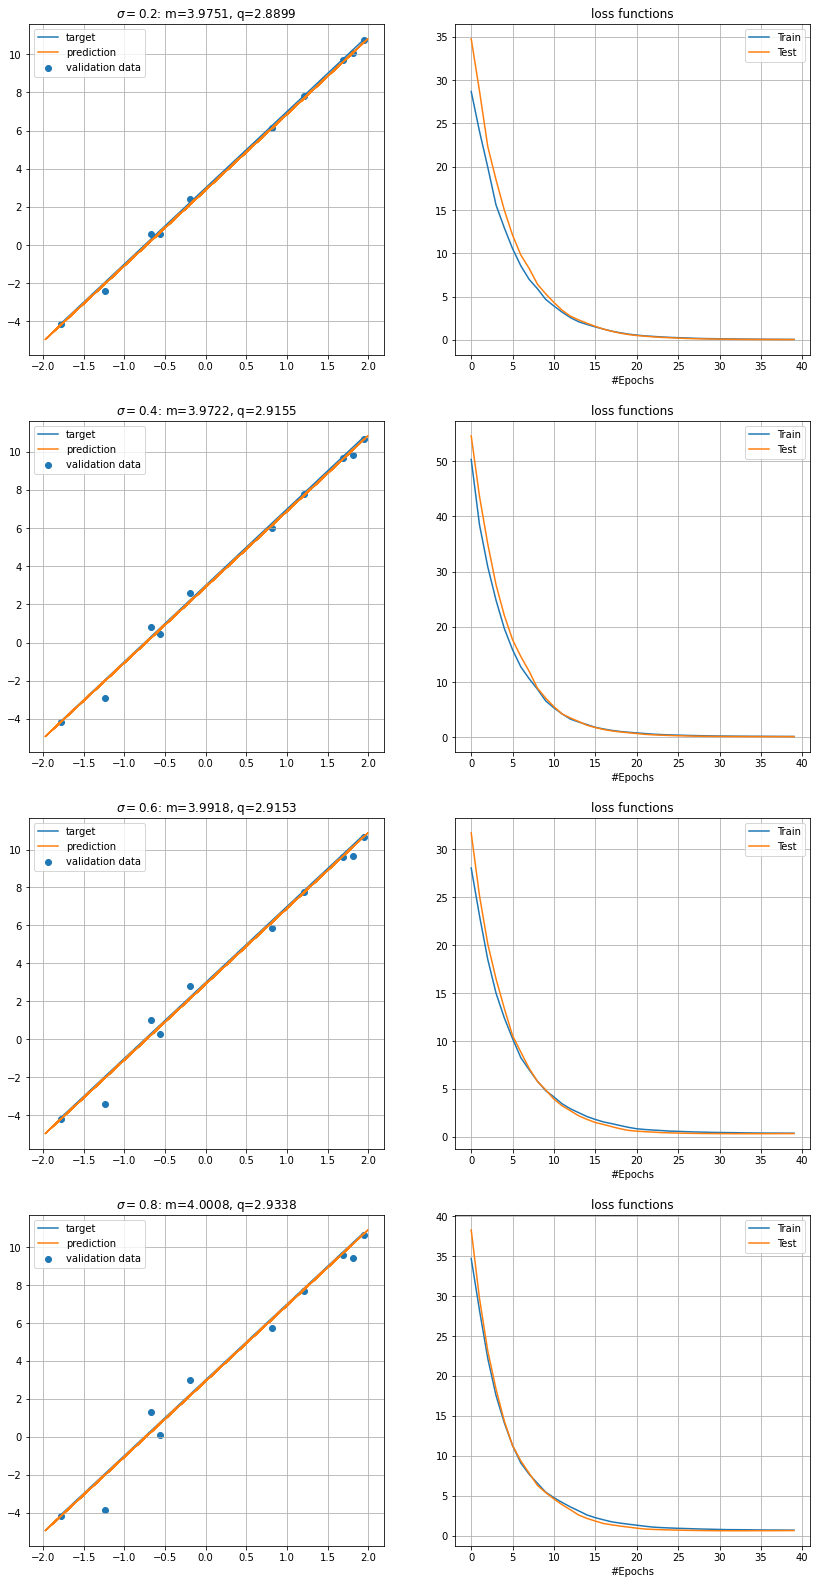

In [5]:
import numpy as np
import matplotlib.pyplot as plt

sigma=np.array([0.2,0.4,0.6,0.8])
w=np.loadtxt('data/vsNoise/weights.dat')
pred=np.loadtxt('data/vsNoise/pred.dat')
l=np.loadtxt('data/vsNoise/loss.dat')
val=np.loadtxt('data/vsNoise/valid.dat')

sub = np.arange(421,428,2)
plt.figure(figsize=(14, 28))

for i in range(len(sigma)):
    plt.subplot(sub[i])
    plt.scatter(val[0],val[i+1], label='validation data')
    plt.plot(val[0],line(val[0]), label='target')
    plt.plot(pred[0],pred[i+1], label='prediction')
    plt.title('$\sigma =' + str(sigma[i]) + '$: m='+str(round(w[i][0], 4))+', q='+str(round(w[i][1], 4)))
    plt.grid(True)
    plt.legend()
    
    plt.subplot(sub[i]+1)
    plt.plot(l[2*i], label='Train')
    plt.plot(l[2*i+1], label='Test')
    plt.xlabel('#Epochs')
    #plt.ylabel()
    plt.title('loss functions')
    plt.grid(True)
    plt.legend()

plt.show()

## Exercise 11.2

Sviluppare reti neurali in grado di effettuare la regressione della funzione $f(x)=4-3x-2x^2+3x^3$ nell'intervallo $x \in [-1,1]$, sperimentando diverse configurazioni e osservando come cambiano le predizioni. In particolare testeremo reti con differenti **layers**, **funzioni di attivazione**, **optimizers** e **loss functions**.

In ogni test sono stati utilizzati i seguenti paraemtri:
- $1000$ dati di training
- $50$ epoche
- rumore a media nulla $\sigma = 0.2$
- Dense connected NN


<img src='img/DNN.png' width=500>
<center> <font size=0.8> Struttura generica di una dense connected deep neural network </font> </center>


### <font color='blue'> Numero di neuroni </font>
Valuto il comportamento di una rete neurale aumentando progressivamente il numero di neuroni presenti nel layer e eventualmente il numero di layers.
Mantengo costanti le altre caratteristiche della rete, qui riportate:

- **Activation function**: funzione standard *relu*
- **Loss function**: mean squared error
- **Optimizer**: stochastic gradient descent

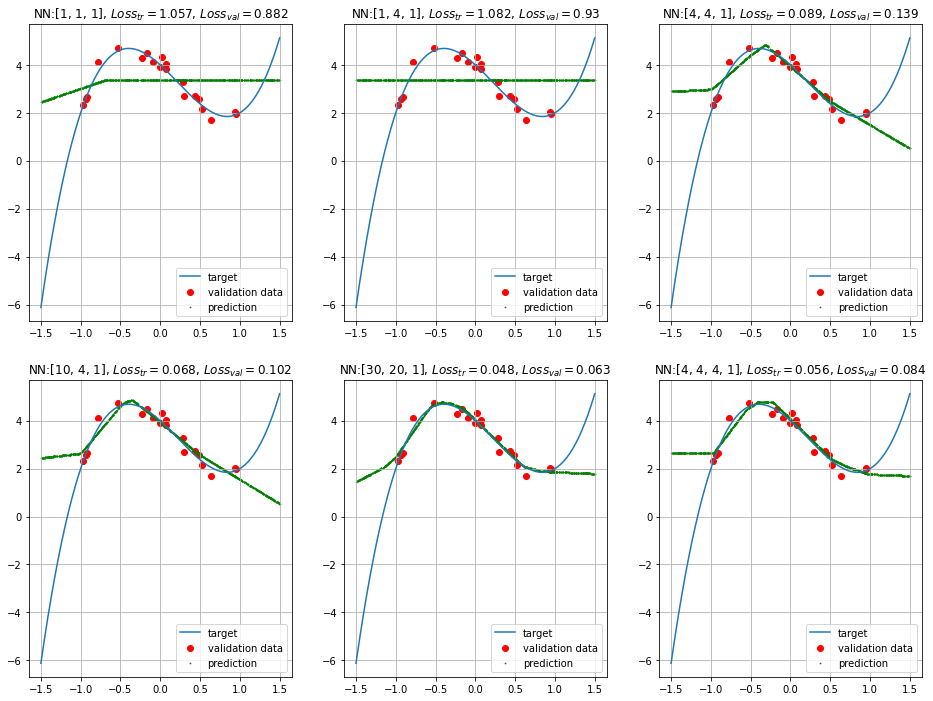

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def target(x): return 4 - 3*x - 2*x**2 + 3*x**3
x_targ=np.linspace(-1.5,1.5,1000)

N=[[1,1,1],[1,4,1],[4,4,1],[10,4,1],[30,20,1],[4,4,4,1]] #network layers
sub = [231, 232, 233, 234, 235, 236]
val=np.loadtxt('data/vsLayers/valid.dat')
pre=np.loadtxt('data/vsLayers/pred.dat')
los=np.loadtxt('data/vsLayers/losses.dat')

plt.figure(figsize=(16, 12))
for i in range(len(N)):
    plt.subplot(sub[i])
    plt.title('NN:'+str(N[i])+r', $Loss_{tr}=$'+str(round(los[i][0],3))+r', $Loss_{te}=$'+str(round(los[i][1],3)))
    plt.scatter(val[0], val[1], color='r', label='validation data') #dati per validazione    
    plt.scatter(pre[0], pre[i+1], color='green', label='prediction', s=0.5) #predizione NN
    plt.plot(x_targ, target(x_targ), label='target')#, lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

Chiaramente le rete più effcace utilizzata è quella con il maggior numero di neuroni $[30,20,1]$, si può notare però che anche con un numero piuttosto inferiore di neuroni ma un layer di profondità in più si riesce a a fare bene: ho *loss* più basse in $[4,4,4,1]$ rispetto a $[10,4,1]$ pur avendo 2 unità in meno; hidden layers (and links) matter!

### <font color='blue'> Activation Function </font>
Valuto il comportamento di una rete neurale con configurazione fissata, vario però la funzione di attivazione utilizzata dalla rete (tutti i layers utilizzano la stessa funzione di attivazione).
Mantengo costanti le altre caratteristiche della rete, qui riportate:

- **Rete neurale**: $[25,25,25,1]$
- **Loss function**: mean squared error
- **Optimizer**: stochastic gradient descent

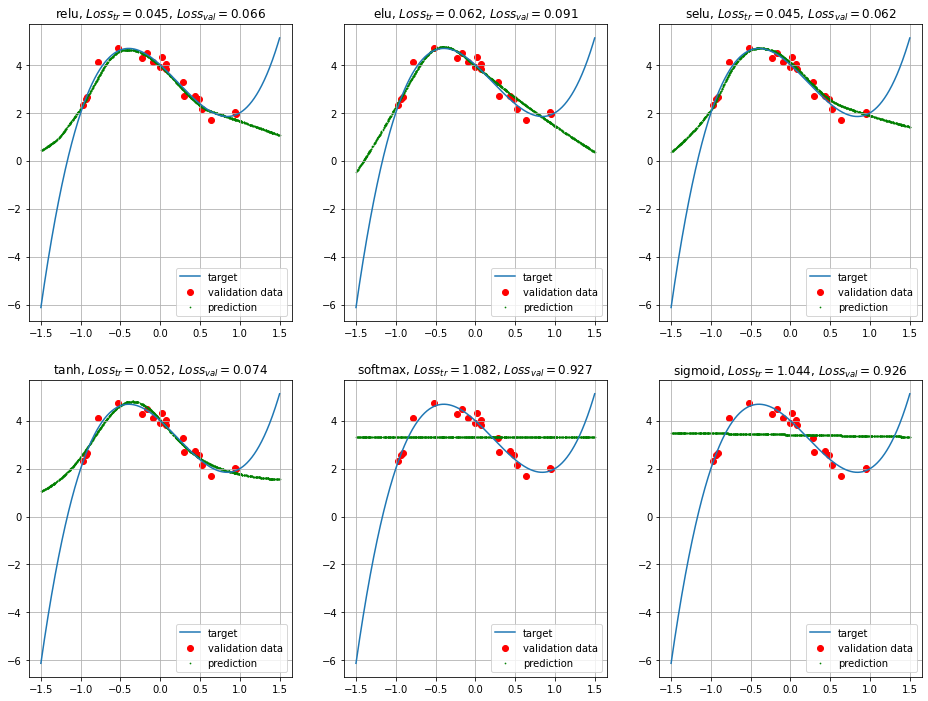

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def target(x): return 4 - 3*x - 2*x**2 + 3*x**3
x_targ=np.linspace(-1.5,1.5,1000)

act=['relu','elu','selu','tanh','softmax','sigmoid'] #activation functions
sub = [231, 232, 233, 234, 235, 236]
val=np.loadtxt('data/vsActf/valid.dat')
pre=np.loadtxt('data/vsActf/pred.dat')
los=np.loadtxt('data/vsActf/losses.dat')

plt.figure(figsize=(16, 12))
for i in range(len(act)):
    plt.subplot(sub[i])
    plt.title(str(act[i])+r', $Loss_{tr}=$'+str(round(los[i][0],3))+r', $Loss_{te}=$'+str(round(los[i][1],3)))
    plt.scatter(val[0], val[1], color='r', label='validation data') #dati per validazione    
    plt.scatter(pre[0], pre[i+1], color='green', label='prediction', s=0.5) #predizione NN
    plt.plot(x_targ, target(x_targ), label='target')#, lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

Osservando i profili e i valori di loss, le migliori funzioni di attivazione per questo problema sembrano essere *selu*, *relu* e *tanh*.

### <font color='blue'> Optimizer </font> 
Valuto il comportamento di una rete neurale con configurazione fissata, vario però l'ottimizzatore del modello.
Mantengo costanti le altre caratteristiche della rete, qui riportate:

- **Rete neurale**: $[25,25,25,1]$
- **Loss function**: mean squared error
- **Activation function**: funzione standard *relu*

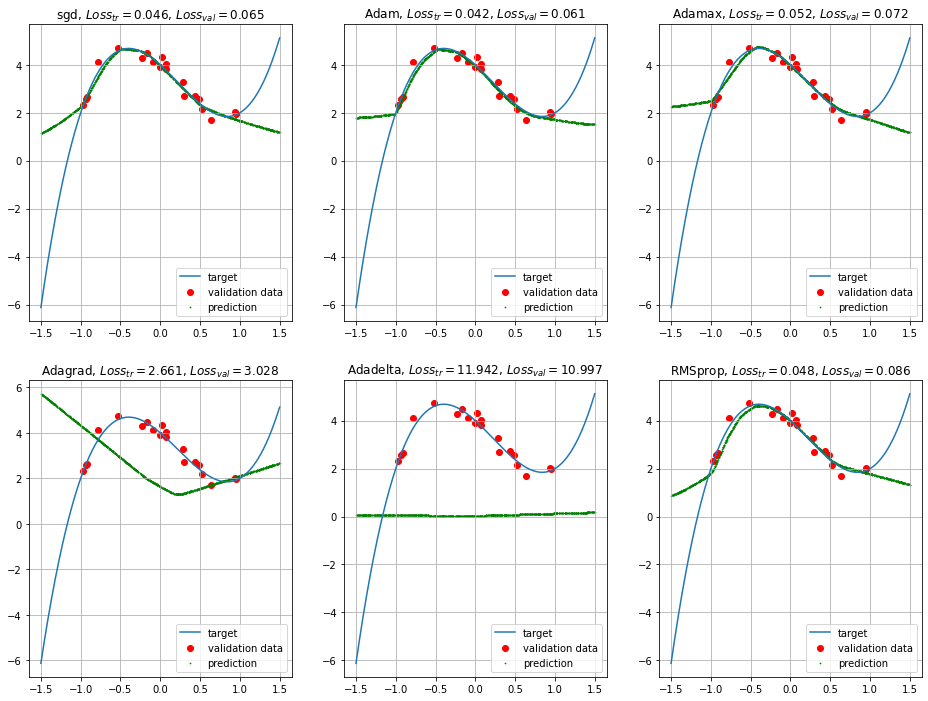

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def target(x): return 4 - 3*x - 2*x**2 + 3*x**3
x_targ=np.linspace(-1.5,1.5,1000)

opt=['sgd','Adam','Adamax','Adagrad','Adadelta','RMSprop'] #optimizers
sub = [231, 232, 233, 234, 235, 236]
val=np.loadtxt('data/vsOpt/valid.dat')
pre=np.loadtxt('data/vsOpt/pred.dat')
los=np.loadtxt('data/vsOpt/losses.dat')

plt.figure(figsize=(16, 12))
for i in range(len(opt)):
    plt.subplot(sub[i])
    plt.title(str(opt[i])+r', $Loss_{tr}=$'+str(round(los[i][0],3))+r', $Loss_{te}=$'+str(round(los[i][1],3)))
    plt.scatter(val[0], val[1], color='r', label='validation data') #dati per validazione    
    plt.scatter(pre[0], pre[i+1], color='green', label='prediction', s=0.5) #predizione NN
    plt.plot(x_targ, target(x_targ), label='target')#, lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

Osservando i profili e i valori di loss, i migliori ottimizzatori per questo problema sembrano essere *Adam*, *sgd* e *Adamax*.

### <font color='blue'> Loss function </font> 
Valuto il comportamento di una rete neurale con configurazione fissata, variando la *loss function* del modello (le funzioni scelte sono state usate anche come metrica); ho tentato di testare tutte e tre le classi di loss offerte da *Keras*: *probabilstic*, *regression* e *for "maximum-margin" classification* losses. Provo inoltre a utilizzare optimizer e funzione di attivazione che hanno fornito i risultati migliori nei test precedenti.
Mantengo costanti le altre caratteristiche della rete, qui riportate:

- **Rete neurale**: $[25,25,25,1]$
- **Optimizer**: *Adam*
- **Activation function**: *selu*

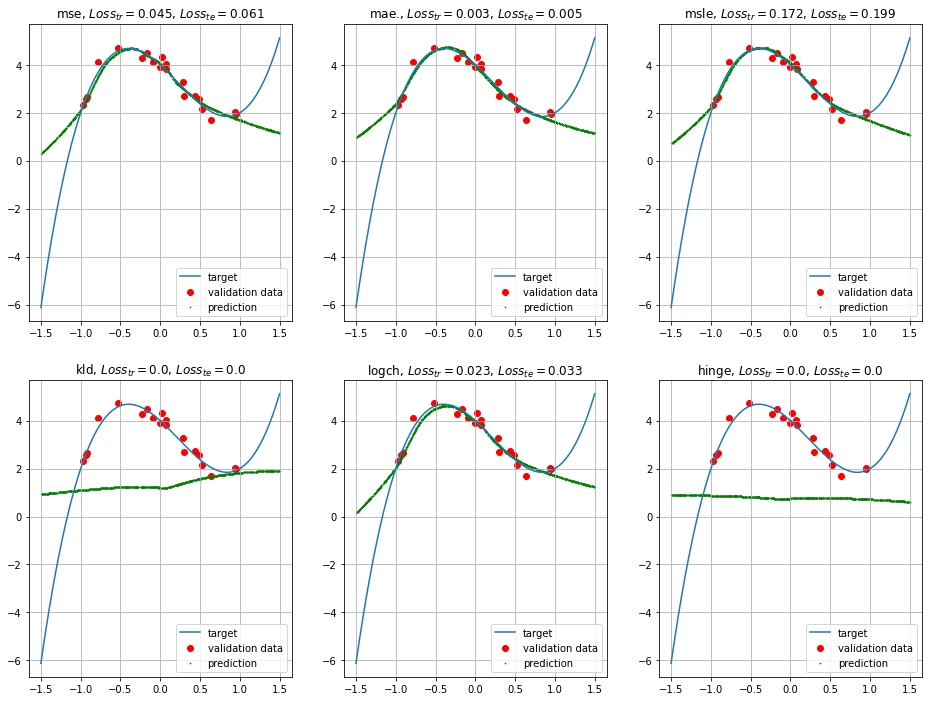

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def target(x): return 4 - 3*x - 2*x**2 + 3*x**3
x_targ=np.linspace(-1.5,1.5,1000)

namelos=['mse','mae.','msle','kld','logch','hinge'] #optimizers
sub = [231, 232, 233, 234, 235, 236]
val=np.loadtxt('data/vsLoss/valid.dat')
pre=np.loadtxt('data/vsLoss/pred.dat')
los=np.loadtxt('data/vsLoss/losses.dat')

plt.figure(figsize=(16, 12))
for i in range(len(namelos)):
    plt.subplot(sub[i])
    plt.title(str(namelos[i])+r', $Loss_{tr}=$'+str(round(los[i][0],3))+r', $Loss_{te}=$'+str(round(los[i][1],3)))
    plt.scatter(val[0], val[1], color='r', label='validation data') #dati per validazione    
    plt.scatter(pre[0], pre[i+1], color='green', label='prediction', s=0.5) #predizione NN
    plt.plot(x_targ, target(x_targ), label='target')#, lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

Osservando i profili e i valori di loss, per questo compito sembra particolarmente efficace il *mean absolute error*

### <font color='red'> Considerazioni finali </font> 
Come è lecito aspettarsi, la correttezza della predizione della rete neurale dipende fortemente dal numero di unità e layers utilizzati (e quindi di traniable parameters): aumentando il numero di neuroni nel layer di input e negli hidden layer si ha un miglioramento significativo, grazie al *teroema di aprrossimazione universale* so di poter riprodurre ogni funzione continua con precisione arbitraria. Anche gli altri parametri esplorati influenzano le predizioni, la loro influenza dipende molto anche dal tipo di problema che la rete deve affrontare. E' importante osservare infine che la predizione risulta corretta solo nell'intervallo di training $[-1,1]$: fuori da questo intervallo, dove non ho dati per allenare la rete a sapere come si deve comportare, tutte le reti neurali testate producono risultati errati, come del resto dovrei aspettarmi.

## Exercise 11.3
Sviluppare una rete neurale per effettuare la regressione della funzione da  $\mathbb{R} ^2$ in $\mathbb{R}$
$$f(x,y) = \sin(x^2+y^2) \quad in \quad x,y \in [-3/2,3/2]$$

Per questo compito servirà ho scelto di usare una rete un po' più fitta, ampliando quella testata nel caso precedente:

- Rete neurale: *Dense conntected*, [150,50,30,1]
- Epoche: 150 (sempre batch size=$32$)
- Rumore: $\mu =0$, $\sigma =0.25$
- Training data: 1000
- Validation data: 100

dopo alcune prove ho scelto le seguenti caratteristiche, che sembravano dare i migliori risultati nel momento dei test

- Activation function:, *relu* per ogni layer
- Optimizer: *Stochastic gradient descent*
- Loss and metrics: *mean squared error*

L'input sarà ancora un oggetto di rango $0$ ma di dimensione $2$, avendo una funzione $f: \mathbb{R} ^2 \longrightarrow \mathbb{R}$. Lo specchietto sottostante mostra un possibile codice sorgente della rete.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">model = Sequential()</font><br />
<font face="Courier">model.add(Dense(units=150, input_shape=(2,) activation='relu')) </font><br />
<font face="Courier">model.add(Dense(units=50, activation='relu')) </font><br />
<font face="Courier">model.add(Dense(units=30, activation='relu')) </font><br />
<font face="Courier">model.add(Dense(1))</font><br />
<font face="Courier">model.compile(optimizer='sgd', loss='mse', metrics=['mse']) </font><br />
</p>

Il grafici seguenti mostrano le predizione della rete, la quale sembra abbastanza consistente anche in presenza di rumore.

Accuracy : 0.0113409


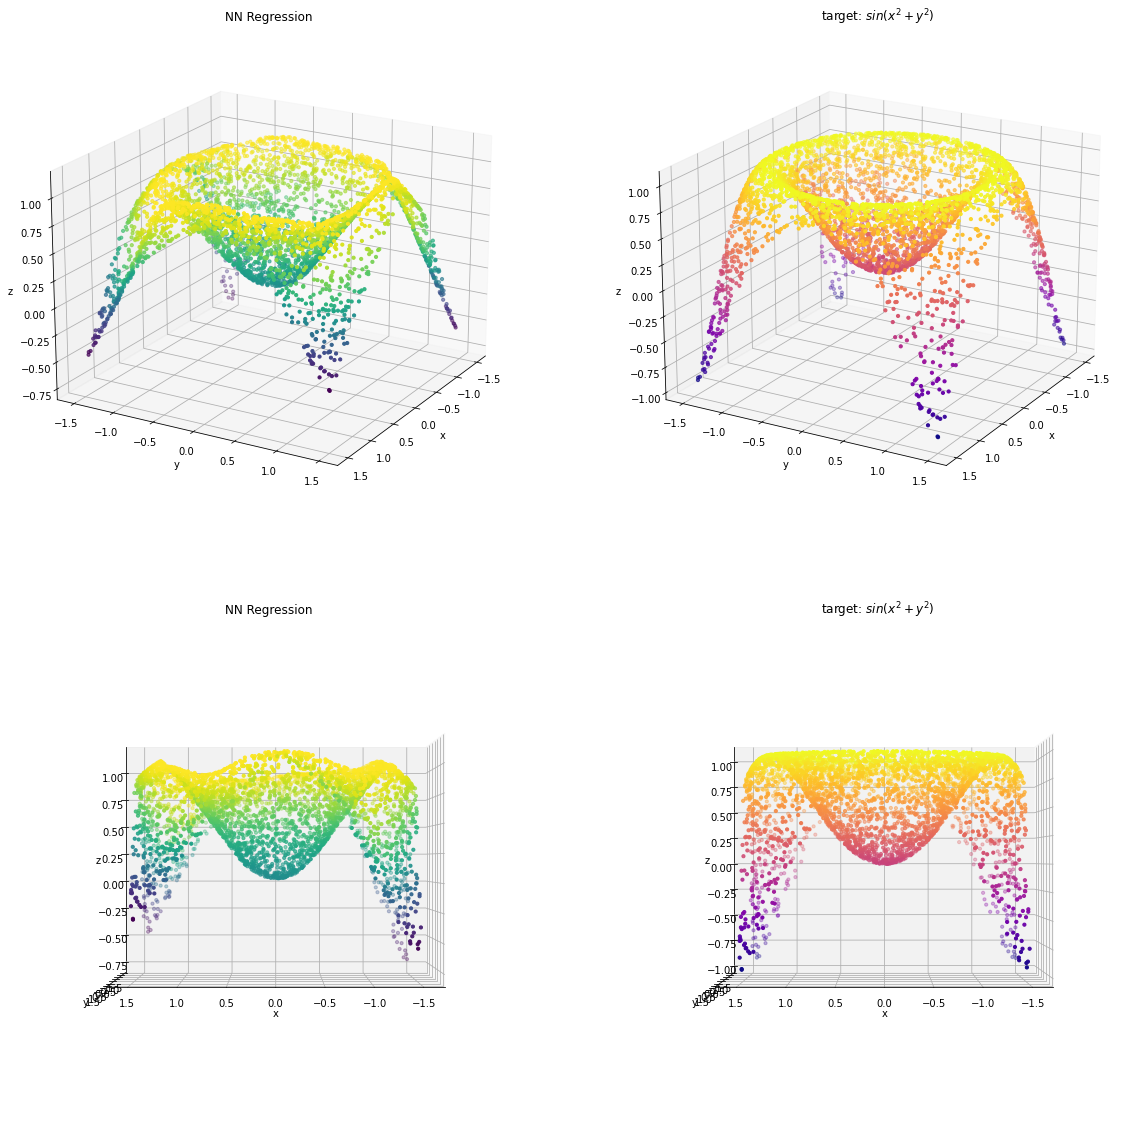

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from source.functions3 import f_targ

#val=np.loadtxt('data/ex3/valid.dat')
pre=np.loadtxt('data/ex3/pred.dat')
score=np.loadtxt('data/ex3/score.dat')

# print performance
#print('Test loss:', round(score[0],7))
print('Accuracy :', round(score[1],7))

sub=[1,2,3,4]
view=[20,30,0,90]
fig=plt.figure(figsize=(20, 20))

for i in range(2):
    ax = fig.add_subplot(2,2,sub[2*i], projection='3d')
    ax.scatter(pre[0], pre[1], pre[2], c=f_targ(pre[0],pre[1]), s=10) #predizione della rete neurale
    ax.set_title('NN Regression')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(view[2*i], view[2*i+1])

    ax = fig.add_subplot(2,2,sub[2*i+1], projection='3d')
    ax.scatter(pre[0], pre[1], f_targ(pre[0],pre[1]), c=f_targ(pre[0],pre[1]), cmap='plasma', s=10)#funzione target
    ax.set_title('target: $sin(x^2+y^2)$')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(view[2*i], view[2*i+1])

plt.show()